### 1. Read the csv file and compile statistics in the specie_name column, count the frequency and proportion of each species name, and plot bar and pie charts.

Counts:/n species_name
XianMaoChong               1107
ZaZhi1                      777
SanJiaoJiaoZao              531
SuoJiaoZao                  499
JianCiNiLingXingZao         489
JiaoMaoZao                  485
CuCiJiaoZao                 483
YuanShaiZao(zhengmian)      432
DongWuCanZhi                429
WeiLiYuanShaiZao            340
JiaoMaoZao3                 325
RaoZuLeiWuJieYouTi1         316
BuShiShuangWeiZao           273
YuanShaiZao(CeMian)         246
RaoZuLei                    240
ZhengHeXingZao              223
YeGuangZao                  186
GangMaoGenGuanZao           177
SongSanHunHeTi              171
UnknownLarval               141
TaiWuShiNiuQiaoZao          133
ZhongHuaChiZhuangZao        128
ZhongLeiGuTiaoZao           117
ChangTiaoZaZhi              114
ChangTiaoFenBian            104
NiLingChong                 101
ZhuNangChong                 87
BianMianJiaoMaoZao           86
QuZhouZao                    81
BiJianGenGuanZao             78
KaShiJiaoMaoZao  

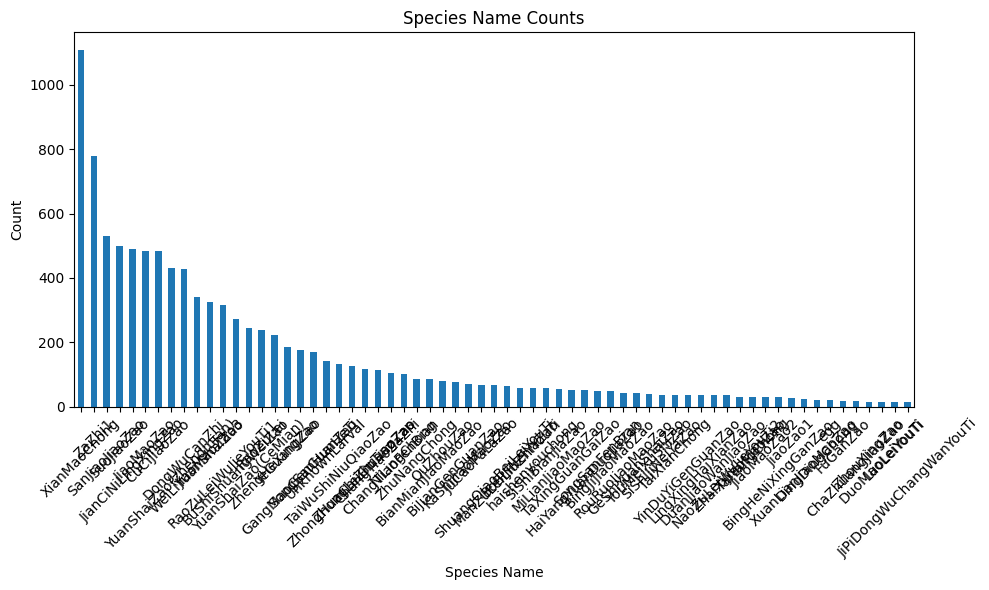

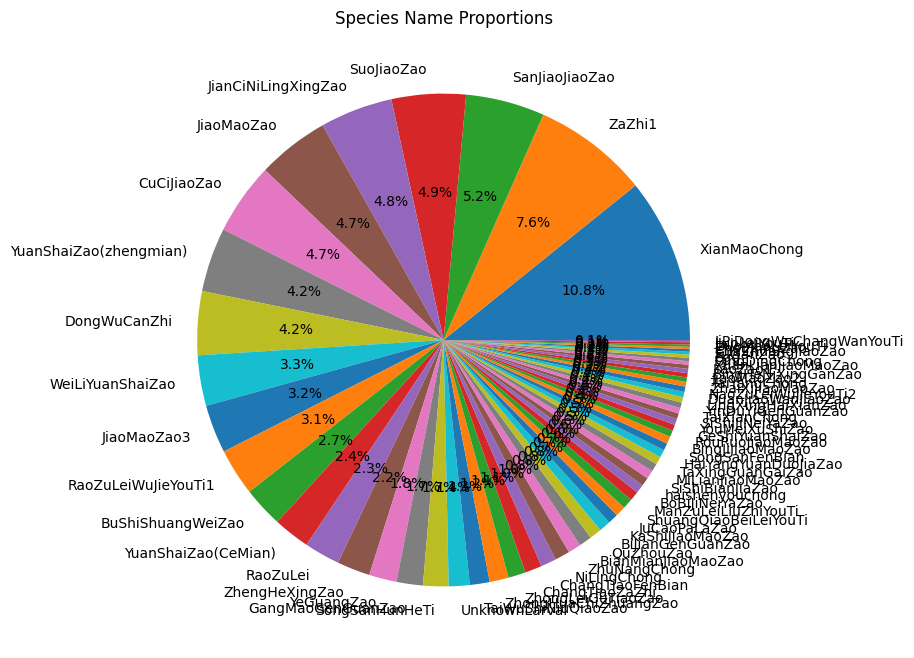

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


filename = 'all_blobs.csv'
df = pd.read_csv(filename)

species_counts = df['species_name'].value_counts()
species_proportions = df['species_name'].value_counts(normalize=True)

pd.set_option('display.max_rows', None)

print("Counts:/n", species_counts)
print("/nProportions:/n", species_proportions)

plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar')
plt.title('Species Name Counts')
plt.xlabel('Species Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
species_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Species Name Proportions')
plt.ylabel('') 
plt.show()

### 2. Read the csv file and calculate the distributions of image_w and image_h based on species_name

   id  image_x  image_y  image_w  image_h  src_x  src_y  src_image  cal_image  \
0  41     1372      555      151      153   1049    346       7590          1   
1  17     1735        2      102      210    283    419        677          1   
2  43     1767      555       52      148    328    779        447          1   
3  48      317      984      183      248    832    618       1703          1   
4  51      809      984       53      258   1189     50       3240          1   

   ppc  ...  ch2_width  ch2_area  ch3_peak  ch3_width  ch3_area  \
0    1  ...        0.0       0.0       0.0        0.0       0.0   
1    1  ...        0.0       0.0       0.0        0.0       0.0   
2    1  ...        0.0       0.0       0.0        0.0       0.0   
3    3  ...        0.0       0.0       0.0        0.0       0.0   
4    1  ...        0.0       0.0       0.0        0.0       0.0   

                 timestamp                            collage_file  \
0  2024-04-25T08:32:17.005  BiJianGenGua

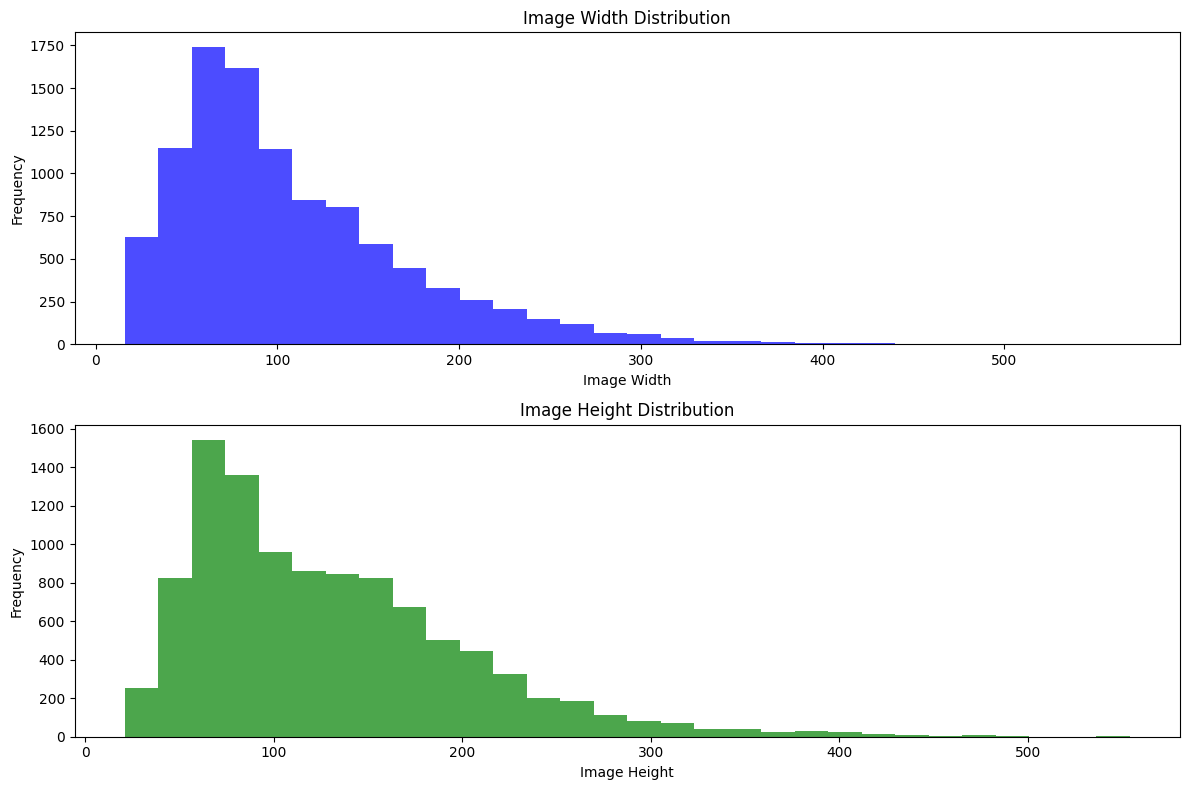

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = 'all_blobs.csv'  # 替换为你的文件路径
df = pd.read_csv(csv_file)

print(df.head())

print(df.isnull().sum())

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

axes[0].hist(df['image_w'], bins=30, alpha=0.7, color='blue')
axes[0].set_title('Image Width Distribution')
axes[0].set_xlabel('Image Width')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['image_h'], bins=30, alpha=0.7, color='green')
axes[1].set_title('Image Height Distribution')
axes[1].set_xlabel('Image Height')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3.Read the total number in csv and the total number in the folder to confirm whether the cropped image is correct

In [10]:
import os
import pandas as pd

image_extensions = { '.png'}

def count_images_in_directory(directory):
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

def count_rows_in_csv(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path)
        return len(df)
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

# blob image dir path
directory = r'../0-Data/2-blobs'

# CSV path
csv_file_path = r'all_blobs.csv'

# blob images count
total_images = count_images_in_directory(directory)
print(f"Total number of images: {total_images}")

# csv row count
total_csv_rows = count_rows_in_csv(csv_file_path)

if total_csv_rows is not None:
    print(f"Total number of rows in CSV: {total_csv_rows}")

    if total_images == total_csv_rows:
        print("The number of images matches the number of rows in the CSV file.")
    else:
        print("The number of images does not match the number of rows in the CSV file.")
else:
    print("Could not read the CSV file to compare.")

Total number of images: 10260
Total number of rows in CSV: 10260
The number of images matches the number of rows in the CSV file.


### 4. show images in train val test set

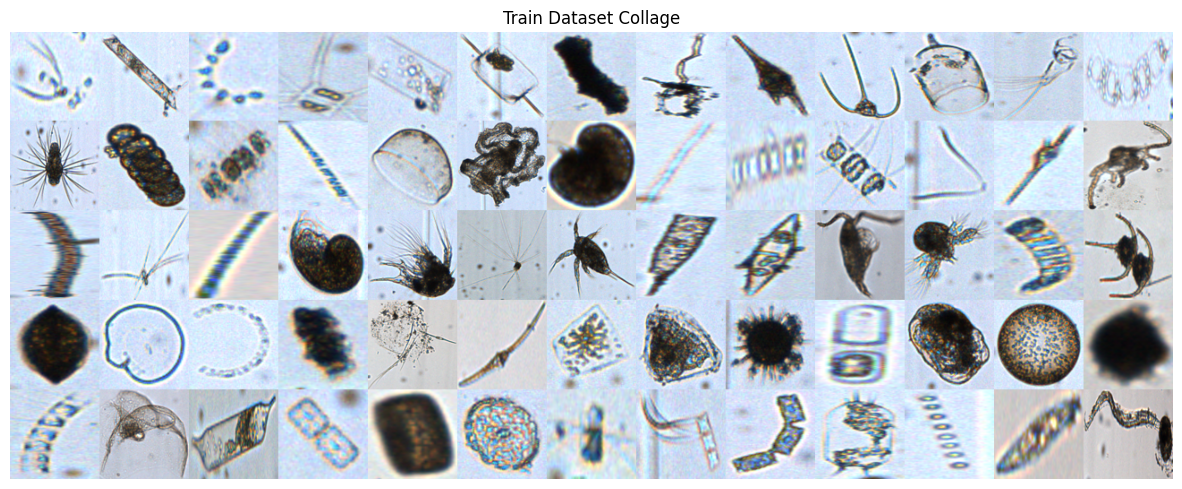

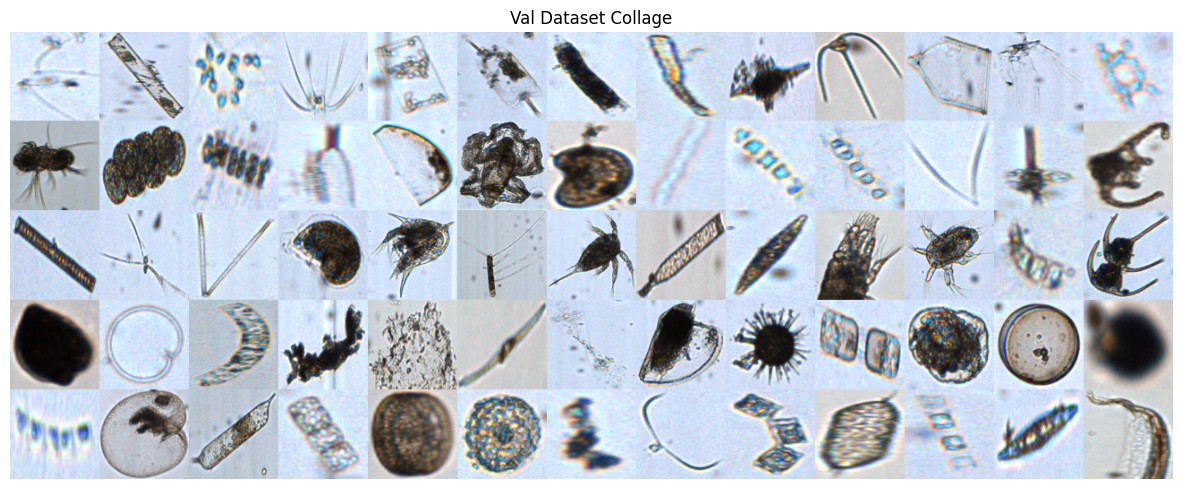

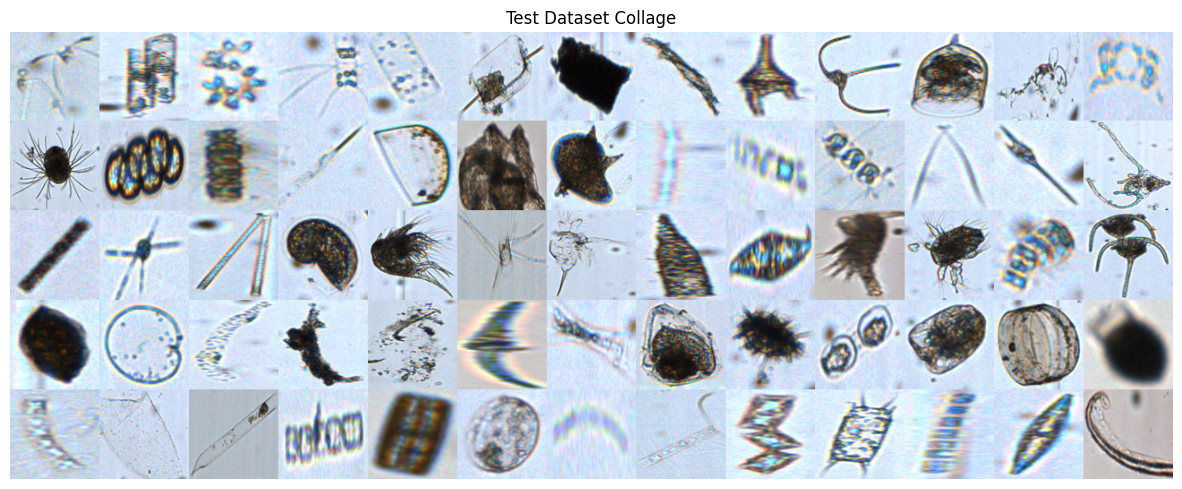

In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def get_random_images(folder_path, target_size=(100, 100)):
    categories = os.listdir(folder_path)
    images = []
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            image_files = os.listdir(category_path)
            if image_files:
                image_file = random.choice(image_files)
                image_path = os.path.join(category_path, image_file)
                image = Image.open(image_path).resize(target_size)
                images.append((image, category))
    return images

def create_collage(images, images_per_row=13, target_size=(100, 100)):
    if not images:
        print("No images to create a collage.")
        return None
    
    width, height = target_size
    rows = (len(images) + images_per_row - 1) // images_per_row
    collage_width = width * images_per_row
    collage_height = height * rows
    
    collage = Image.new('RGB', (collage_width, collage_height))
    
    for idx, (image, category) in enumerate(images):
        x = (idx % images_per_row) * width
        y = (idx // images_per_row) * height
        collage.paste(image, (x, y))
    
    return collage

def display_collage(base_path, dataset, images_per_row=13, target_size=(100, 100)):
    dataset_path = os.path.join(base_path, dataset)
    images = get_random_images(dataset_path, target_size)
    collage = create_collage(images, images_per_row, target_size)
    
    if collage:
        plt.figure(figsize=(15, 10))
        plt.imshow(collage)
        plt.axis('off')
        plt.title(f'{dataset.capitalize()} Dataset Collage')
        plt.show()

base_path = '../0-Data/2-blobs'
datasets = ['train', 'val', 'test']

for dataset in datasets:
    display_collage(base_path, dataset)